In [341]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

#this is a python magic function to automatically show matplotlib plots
%matplotlib inline

In [2]:
urlbase_2019 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2019-Results?gender=&agegroup=&bib=&firstname=&lastname=&page=1'
response = requests.post(urlbase_2019)

response.status_code

200

In [3]:
print(type(response))
response.content

<class 'requests.models.Response'>


b'\n<!DOCTYPE html>\n<!--[if IE 9]><html lang="en" class="ie9 no-js"><![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n<head>\n<script src="/cdn-cgi/apps/head/u7S6kWy3Cysuih2qEtS0XdJlwiE.js"></script><link href="/styles/vendor.min.css" rel="stylesheet" />\n<link href="/styles/rnr.min.css" rel="stylesheet" />\n<meta charset="utf-8" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta http-equiv="Content-type" content="text/html; charset=utf-8">\n<meta content="width=device-width, initial-scale=1.0" name="viewport" />\n<title> | Rock n Roll Marathon Series | Marathon Half Marathon Events</title>\n<meta property="og:title" content="" />\n<meta property="og:image" content="" />\n<meta property="og:description" content="" />\n<meta property="og:url" content="https://www.runrocknroll.com:443/en/Events/Nashville/The Races/Marathon/2019 Results" />\n\n<script>\r\n        (function (w, d, s, l, i) {\r\n            w[l] = w[l] || [];\r\n            w[l].push({\r\n

In [4]:
soup = BeautifulSoup(response.content, 'lxml')
print(soup)

<!DOCTYPE html>
<!--[if IE 9]><html lang="en" class="ie9 no-js"><![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<script src="/cdn-cgi/apps/head/u7S6kWy3Cysuih2qEtS0XdJlwiE.js"></script><link href="/styles/vendor.min.css" rel="stylesheet"/>
<link href="/styles/rnr.min.css" rel="stylesheet"/>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<title> | Rock n Roll Marathon Series | Marathon Half Marathon Events</title>
<meta content="" property="og:title"/>
<meta content="" property="og:image"/>
<meta content="" property="og:description"/>
<meta content="https://www.runrocknroll.com:443/en/Events/Nashville/The Races/Marathon/2019 Results" property="og:url"/>
<script>
        (function (w, d, s, l, i) {
            w[l] = w[l] || [];
            w[l].push({
                'gtm.start':
              

In [5]:
tables = soup.find_all('table', attrs = {'class': 'table table-responsive table-bordered'})
tables

[<table class="table table-responsive table-bordered">
 <tr>
 <th class="table-place">Overall</th>
 <th class="table-place">Bib</th>
 <th class="table-name">Name</th>
 <th class="table-time">Time</th>
 </tr>
 <tr>
 <td>1</td>
 <td>30001</td>
 <td><a href="/en/Events/Nashville/The-Races/Marathon/2019-Results/Athlete?id=30001">Travis Peruski</a></td>
 <td>01:37:54</td>
 </tr>
 <tr>
 <td>2</td>
 <td>1</td>
 <td><a href="/en/Events/Nashville/The-Races/Marathon/2019-Results/Athlete?id=1">Scott Wietecha</a></td>
 <td>02:34:59</td>
 </tr>
 <tr>
 <td>3</td>
 <td>4</td>
 <td><a href="/en/Events/Nashville/The-Races/Marathon/2019-Results/Athlete?id=4">Jordan Wilson</a></td>
 <td>02:35:24</td>
 </tr>
 <tr>
 <td>4</td>
 <td>30034</td>
 <td><a href="/en/Events/Nashville/The-Races/Marathon/2019-Results/Athlete?id=30034">Steelton Flynn</a></td>
 <td>02:39:59</td>
 </tr>
 <tr>
 <td>5</td>
 <td>30035</td>
 <td><a href="/en/Events/Nashville/The-Races/Marathon/2019-Results/Athlete?id=30035">Thomas Ellis</

In [6]:
type(tables)

bs4.element.ResultSet

In [7]:
len(tables)

3

In [8]:
result_list = pd.read_html(str(tables[0])) # a list of dataframes
len(result_list)

1

In [9]:
type(result_list)

list

In [10]:
#this is table we want - with overall finish
marathon = result_list[0] # get the first df from the list
marathon.head(10)

,Overall,Bib,Name,Time
0,1,30001,Travis Peruski,01:37:54
1,2,1,Scott Wietecha,02:34:59
2,3,4,Jordan Wilson,02:35:24
3,4,30034,Steelton Flynn,02:39:59
4,5,30035,Thomas Ellis,02:42:09
5,6,33172,Nicholas Tseffos,02:48:42
6,7,30053,Satoshi Mitsumori,02:50:33
7,8,30051,Harrison Kieffer,02:51:18
8,9,30086,Steven Forte,02:54:34
9,10,30042,Grant Rice,02:55:49


In [11]:
type(marathon)

pandas.core.frame.DataFrame

### Don't use next few cells

In [12]:
#result_list_1 = pd.read_html(str(tables[1])) # a list of dataframes
#len(result_list_1)

In [13]:
#type(result_list_1)

In [14]:
#marathon_1 = result_list_1[0] # get the first df from the list
#marathon_1.head()

In [15]:
#result_list_2 = pd.read_html(str(tables[2])) # a list of dataframes
#len(result_list_2)

In [16]:
#marathon_2 = result_list_2[0] # get the first df from the list
#marathon_2.head(10)

### 2nd page

In [17]:
urlbase_2019_2 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2019-Results?gender=&agegroup=&bib=&firstname=&lastname=&page=2'
response_2 = requests.post(urlbase_2019_2)

response_2.status_code

200

In [18]:
soup_2 = BeautifulSoup(response_2.content, 'lxml')
print(soup_2)

<!DOCTYPE html>
<!--[if IE 9]><html lang="en" class="ie9 no-js"><![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<script src="/cdn-cgi/apps/head/u7S6kWy3Cysuih2qEtS0XdJlwiE.js"></script><link href="/styles/vendor.min.css" rel="stylesheet"/>
<link href="/styles/rnr.min.css" rel="stylesheet"/>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<title> | Rock n Roll Marathon Series | Marathon Half Marathon Events</title>
<meta content="" property="og:title"/>
<meta content="" property="og:image"/>
<meta content="" property="og:description"/>
<meta content="https://www.runrocknroll.com:443/en/Events/Nashville/The Races/Marathon/2019 Results" property="og:url"/>
<script>
        (function (w, d, s, l, i) {
            w[l] = w[l] || [];
            w[l].push({
                'gtm.start':
              

In [19]:
tables_2 = soup_2.find_all('table', attrs = {'class': 'table table-responsive table-bordered'})
tables_2

[<table class="table table-responsive table-bordered">
 <tr>
 <th class="table-place">Overall</th>
 <th class="table-place">Bib</th>
 <th class="table-name">Name</th>
 <th class="table-time">Time</th>
 </tr>
 <tr>
 <td>26</td>
 <td>33054</td>
 <td><a href="/en/Events/Nashville/The-Races/Marathon/2019-Results/Athlete?id=33054">Nixon Gutierrez</a></td>
 <td>03:06:05</td>
 </tr>
 <tr>
 <td>27</td>
 <td>30120</td>
 <td><a href="/en/Events/Nashville/The-Races/Marathon/2019-Results/Athlete?id=30120">Jeff Vinciguerra</a></td>
 <td>03:06:11</td>
 </tr>
 <tr>
 <td>28</td>
 <td>33058</td>
 <td><a href="/en/Events/Nashville/The-Races/Marathon/2019-Results/Athlete?id=33058">Matthew Katz</a></td>
 <td>03:06:21</td>
 </tr>
 <tr>
 <td>29</td>
 <td>30002</td>
 <td><a href="/en/Events/Nashville/The-Races/Marathon/2019-Results/Athlete?id=30002">Carson Davis</a></td>
 <td>03:06:25</td>
 </tr>
 <tr>
 <td>30</td>
 <td>30061</td>
 <td><a href="/en/Events/Nashville/The-Races/Marathon/2019-Results/Athlete?id=

In [20]:
result_list_2 = pd.read_html(str(tables_2[0])) # a list of dataframes
len(result_list_2)

1

In [21]:
marathon_2 = result_list_2[0] # get the first df from the list
marathon_2.head(10)

,Overall,Bib,Name,Time
0,26,33054,Nixon Gutierrez,03:06:05
1,27,30120,Jeff Vinciguerra,03:06:11
2,28,33058,Matthew Katz,03:06:21
3,29,30002,Carson Davis,03:06:25
4,30,30061,Willy Mcnamara,03:07:05
5,31,30119,Jeffrey Suppinger,03:07:41
6,32,7,Leah Frazier Allen,03:07:51
7,33,30513,Emily Soppe,03:11:16
8,34,32300,Anthony Jackson,03:11:30
9,35,30138,Gregg Lamb,03:11:59


### Try pages 1-154

In [22]:
#my for loop
#final_list = []
#url_list = {page:"https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2019-Results?gender=&agegroup=&bib=&firstname=&lastname=&page={}".format(page) for page in list(range(1, 11))}

#for url in range(1,10):
#    response = requests.post(url_list[url])
#    soup = BeautifulSoup(response.content, 'lxml')
#    tables = soup.find_all('table', attrs = {'class': 'table table-responsive table-bordered'})
#    response = pd.read_html(str(tables[0]))
#    final_list.append(response)
    
#print(final_list)

In [6]:
urlbase_2019 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2019-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
urlbase_2018 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2018-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
urlbase_2017 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2017-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
urlbase_2016 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2016-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
urlbase_half_2019 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Half-Marathon/2019-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
urlbase_half_2018 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Half-Marathon/2018-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
urlbase_half_2017 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Half-Marathon/2017-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
urlbase_half_2016 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Half-Marathon/2016-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='

In [7]:
pgs_2016 = 154
pgs_2017 = 147
pgs_2018 = 85
pgs_2019 = 113

pgs_half_2016 = 898
pgs_half_2017 = 892
pgs_half_2018 = 598
pgs_half_2019 = 690

In [8]:
def marathon(url, pages):
    final_list = []
    df = pd.DataFrame()
    for p in range(1, pages + 1): # pages + 1 because range stops at the last number
        response = requests.post(url + str(p)) # Goes to URL and adds p to end of it to select page.
        soup = BeautifulSoup(response.content, 'lxml')
        tables = soup.find_all('table', attrs = {'class': 'table table-responsive table-bordered'})
        result_list = pd.read_html(str(tables[0]))
        final_list = result_list[0]
        df = df.append(final_list, ignore_index = True)
    return df  


### Full 2016

In [9]:
full_2016=marathon(urlbase_2016, pgs_2016)

In [10]:
type(full_2016)

pandas.core.frame.DataFrame

In [11]:
full_2016.tail(26)

,Overall,Bib,Name,Time
3816,99999,26287,Tara Sullivan,00:00:00
3817,99999,5061,Caitlin Ries,00:00:00
3818,99999,21042,Lena Selzer,00:00:00
3819,99999,10077,Shannon Bondurant,00:00:00
3820,99999,8018,Laquenza Morgan,00:00:00
3821,99999,5077,Clifton Miller,00:00:00
3822,99999,9092,Brian Precious,00:00:00
3823,99999,5037,Misty Adfield,00:00:00
3824,99999,25093,Makenzie Bosshard,00:00:00
3825,99999,7201,Erik Manfred,00:00:00


In [12]:
full_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3842 entries, 0 to 3841
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Overall  3842 non-null   int64 
 1   Bib      3842 non-null   int64 
 2   Name     3842 non-null   object
 3   Time     3842 non-null   object
dtypes: int64(2), object(2)
memory usage: 120.2+ KB


In [14]:
#slowest finisher
slowest_2016=full_2016["Time"].max()
slowest_2016 = pd.to_datetime(slowest_2016)
slowest_2016

Timestamp('2020-11-22 07:00:00')

In [15]:
#fastest finisher
bib_2016=full_2016.loc[full_2016['Overall'] == 1]
fastest_2016=bib_2016["Time"].min()
fastest_2016 = pd.to_datetime(fastest_2016)
fastest_2016

Timestamp('2020-11-22 02:25:42')

In [16]:
#difference between fastest and slowest finishers
difference_2016 = (slowest_2016-fastest_2016)
difference_2016

Timedelta('0 days 04:34:18')

In [54]:
#number of runners
runners_2016=full_2016['Overall'].count()
runners_2016

3842

In [17]:
#number of runners who did not finish
full_2016_dnf=np.sum(full_2016['Overall'] == 99999)
full_2016_dnf

890

In [170]:
# put in dataframe
data_full_2016 = {'Race':'2016','Runners': [runners_2016], 'Fastest Time': [fastest_2016],
                   'Slowest Time': [slowest_2016],'Time Difference': [difference_2016],
                   'Did Not Finish': [full_2016_dnf]}

full_2016_summary = pd.DataFrame (data_full_2016, columns = ['Race','Runners','Fastest Time','Slowest Time','Time Difference','Did Not Finish'])

full_2016_summary


,Race,Runners,Fastest Time,Slowest Time,Time Difference,Did Not Finish
0,2016,3842,2020-11-22 02:25:42,2020-11-22 07:00:00,04:34:18,890


### Full 2017

In [20]:
full_2017=marathon(urlbase_2017, pgs_2017)

In [21]:
full_2017.head(26)

,Overall,Bib,Name,Time
0,1,1,Scott Wietecha,02:40:25
1,2,1145,Ryan Regnier,02:56:28
2,3,1147,Daniel Everett,03:00:55
3,4,1029,Khris Vickroy,03:04:47
4,5,1119,Marcus Dilallo,03:04:53
5,6,1135,Edgar Garza,03:06:20
6,7,1129,brad sawa,03:06:47
7,8,1115,Chris Jones,03:08:35
8,9,1122,Peter Volgyesi,03:09:01
9,10,1117,Benjamin Saunders,03:09:13


In [22]:
#slowest finisher
slowest_2017=full_2017["Time"].max()
slowest_2017 = pd.to_datetime(slowest_2017)
slowest_2017

Timestamp('2020-11-22 06:38:19')

In [23]:
#fastest finisher
bib_2017=full_2017.loc[full_2017['Overall'] == 1]
fastest_2017=bib_2017["Time"].min()
fastest_2017 = pd.to_datetime(fastest_2017)
fastest_2017

Timestamp('2020-11-22 02:40:25')

In [24]:
#difference between fastest and slowest finishers
difference_2017 = (slowest_2017-fastest_2017)
difference_2017

Timedelta('0 days 03:57:54')

In [55]:
#number of runners
runners_2017=full_2017['Overall'].count()
runners_2017

3651

In [25]:
#number of runners who did not finish
full_2017_dnf=np.sum(full_2017['Overall'] == 99999)
full_2017_dnf

1185

In [169]:
# put in dataframe
data_full_2017 = {'Race':'2017','Runners': [runners_2017], 'Fastest Time': [fastest_2017],
                   'Slowest Time': [slowest_2017],'Time Difference': [difference_2017],
                   'Did Not Finish': [full_2017_dnf]}

full_2017_summary = pd.DataFrame (data_full_2017, columns = ['Race','Runners','Fastest Time','Slowest Time','Time Difference','Did Not Finish'])

full_2017_summary

,Race,Runners,Fastest Time,Slowest Time,Time Difference,Did Not Finish
0,2017,3651,2020-11-22 02:40:25,2020-11-22 06:38:19,03:57:54,1185


### Full 2018

In [27]:
full_2018=marathon(urlbase_2018, pgs_2018)

In [29]:
full_2018.tail(26)

,Overall,Bib,Name,Time
2089,2090,32210,Shawn Douthit,06:27:27
2090,2091,33333,Chris Bloch,06:27:29
2091,2092,32916,Jeff Riddle,06:28:06
2092,2093,31711,Rick Sears,06:30:13
2093,2094,33634,Dwight Williams,06:30:28
2094,2095,31703,Kelsey Mark,06:31:10
2095,2096,33048,John Points,06:31:28
2096,2097,31594,Brett Dunlap,06:32:57
2097,2098,33211,Meghann Richardson,06:33:08
2098,2099,536,Patti Mortland,06:34:24


In [30]:
#slowest finisher
slowest_2018=full_2018["Time"].max()
slowest_2018 = pd.to_datetime(slowest_2018)
slowest_2018

Timestamp('2020-11-22 06:54:09')

In [31]:
#fastest finisher
bib_2018=full_2018.loc[full_2018['Overall'] == 1]
fastest_2018=bib_2018["Time"].min()
fastest_2018 = pd.to_datetime(fastest_2018)
fastest_2018

Timestamp('2020-11-22 02:28:16')

In [32]:
#difference between fastest and slowest finishers
difference_2018 = (slowest_2018-fastest_2018)
difference_2018

Timedelta('0 days 04:25:53')

In [149]:
#number of runners
runners_2018=full_2018['Overall'].count()
runners_2018

2115

In [150]:
#number of runners who did not finish
full_2018_dnf=np.sum(full_2018['Overall'] == 99999)
full_2018_dnf

8

In [168]:
# put in dataframe
data_full_2018 = {'Race':'2018','Runners': [runners_2018], 'Fastest Time': [fastest_2018],
                   'Slowest Time': [slowest_2018],'Time Difference': [difference_2018],
                   'Did Not Finish': [full_2018_dnf]}

full_2018_summary = pd.DataFrame (data_full_2018, columns = ['Race','Runners','Fastest Time','Slowest Time','Time Difference','Did Not Finish'])

full_2018_summary

,Race,Runners,Fastest Time,Slowest Time,Time Difference,Did Not Finish
0,2018,2115,2020-11-22 02:28:16,2020-11-22 06:54:09,04:25:53,8


### Full 2019

In [35]:
full_2019=marathon(urlbase_2019, pgs_2019)

In [256]:
full_2019.head(26)

,Overall,Bib,Name,Time
0,1,30001,Travis Peruski,01:37:54
1,2,1,Scott Wietecha,02:34:59
2,3,4,Jordan Wilson,02:35:24
3,4,30034,Steelton Flynn,02:39:59
4,5,30035,Thomas Ellis,02:42:09
5,6,33172,Nicholas Tseffos,02:48:42
6,7,30053,Satoshi Mitsumori,02:50:33
7,8,30051,Harrison Kieffer,02:51:18
8,9,30086,Steven Forte,02:54:34
9,10,30042,Grant Rice,02:55:49


In [37]:
#slowest finisher
slowest_2019=full_2019["Time"].max()
slowest_2019 = pd.to_datetime(slowest_2019)
slowest_2019

Timestamp('2020-11-22 06:43:55')

In [38]:
#fastest finisher
bib_2019=full_2019.loc[full_2019['Overall'] == 1]
fastest_2019=bib_2019["Time"].min()
fastest_2019 = pd.to_datetime(fastest_2019)
fastest_2019

Timestamp('2020-11-22 01:37:54')

In [39]:
#difference between fastest and slowest finishers
difference_2019 = (slowest_2019-fastest_2019)
difference_2019

Timedelta('0 days 05:06:01')

In [57]:
#number of runners
runners_2019=full_2019['Overall'].count()
runners_2019

2811

In [40]:
#number of runners who did not finish
full_2019_dnf=np.sum(full_2019['Overall'] == 99999)
full_2019_dnf

786

In [167]:
# put in dataframe
data_full_2019 = {'Race':'2019','Runners': [runners_2019], 'Fastest Time': [fastest_2019],
                   'Slowest Time': [slowest_2019],'Time Difference': [difference_2019],
                   'Did Not Finish': [full_2019_dnf]}

full_2019_summary = pd.DataFrame (data_full_2019, columns = ['Race','Runners','Fastest Time','Slowest Time','Time Difference','Did Not Finish'])

full_2019_summary

,Race,Runners,Fastest Time,Slowest Time,Time Difference,Did Not Finish
0,2019,2811,2020-11-22 01:37:54,2020-11-22 06:43:55,05:06:01,786


### Half 2016

In [45]:
half_2016=marathon(urlbase_half_2016, pgs_half_2016)

In [58]:
half_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22429 entries, 0 to 22428
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Overall  22429 non-null  int64 
 1   Bib      22429 non-null  int64 
 2   Name     22429 non-null  object
 3   Time     22429 non-null  object
dtypes: int64(2), object(2)
memory usage: 701.0+ KB


In [47]:
#slowest finisher
slowest_half_2016=half_2016["Time"].max()
slowest_half_2016 = pd.to_datetime(slowest_half_2016)
slowest_half_2016

Timestamp('2020-11-22 04:54:41')

In [48]:
#fastest finisher
bib_half_2016=half_2016.loc[half_2016['Overall'] == 1]
fastest_half_2016=bib_half_2016["Time"].min()
fastest_half_2016 = pd.to_datetime(fastest_half_2016)
fastest_half_2016

Timestamp('2020-11-22 01:11:15')

In [49]:
#difference between fastest and slowest finishers
difference_half_2016 = (slowest_half_2016-fastest_half_2016)
difference_half_2016

Timedelta('0 days 03:43:26')

In [68]:
#number of runners
runners_half_2016=half_2016['Overall'].count()
runners_half_2016

22429

In [59]:
#number of runners who did not finish
half_2016_dnf=np.sum(half_2016['Overall'] == 99999)
half_2016_dnf

4512

In [166]:
# put in dataframe
data_half_2016 = {'Race':'2016','Runners': [runners_half_2016], 'Fastest Time': [fastest_half_2016],
                   'Slowest Time': [slowest_half_2016],'Time Difference': [difference_half_2016],
                   'Did Not Finish': [half_2016_dnf]}

half_2016_summary = pd.DataFrame (data_half_2016, columns = ['Race','Runners','Fastest Time','Slowest Time','Time Difference','Did Not Finish'])

half_2016_summary

,Race,Runners,Fastest Time,Slowest Time,Time Difference,Did Not Finish
0,2016,22429,2020-11-22 01:11:15,2020-11-22 04:54:41,03:43:26,4512


### Half 2017

In [70]:
half_2017=marathon(urlbase_half_2017, pgs_half_2017)

In [71]:
half_2017.tail()

,Overall,Bib,Name,Time
22287,99999,37356,Joseph Holder,00:00:00
22288,99999,28230,Beth Fritch,00:00:00
22289,99999,2618,Kevin Huffman,00:00:00
22290,99999,21283,Harmon Roberts,00:00:00
22291,99999,11428,Coreen Donaldson,00:00:00


In [72]:
#slowest finisher
slowest_half_2017=half_2017["Time"].max()
slowest_half_2017 = pd.to_datetime(slowest_half_2017)
slowest_half_2017

Timestamp('2020-11-22 06:18:24')

In [73]:
#fastest finisher
bib_half_2017=half_2017.loc[half_2017['Overall'] == 1]
fastest_half_2017=bib_half_2017["Time"].min()
fastest_half_2017 = pd.to_datetime(fastest_half_2017)
fastest_half_2017

Timestamp('2020-11-22 01:10:58')

In [74]:
#difference between fastest and slowest finishers
difference_half_2017 = (slowest_half_2017-fastest_half_2017)
difference_half_2017

Timedelta('0 days 05:07:26')

In [77]:
#number of runners
runners_half_2017=half_2017['Overall'].count()
runners_half_2017

22292

In [75]:
#number of runners who did not finish
half_2017_dnf=np.sum(half_2017['Overall'] == 99999)
half_2017_dnf

4593

In [165]:
# put in dataframe
data_half_2017 = {'Race':'2017','Runners': [runners_half_2017], 'Fastest Time': [fastest_half_2017],
                   'Slowest Time': [slowest_half_2017],'Time Difference': [difference_half_2017],
                   'Did Not Finish': [half_2017_dnf]}

half_2017_summary = pd.DataFrame (data_half_2017, columns = ['Race','Runners','Fastest Time','Slowest Time','Time Difference','Did Not Finish'])

half_2017_summary

,Race,Runners,Fastest Time,Slowest Time,Time Difference,Did Not Finish
0,2017,22292,2020-11-22 01:10:58,2020-11-22 06:18:24,05:07:26,4593


### Half 2018

In [80]:
half_2018=marathon(urlbase_half_2018, pgs_half_2018)

In [81]:
half_2018.tail()

,Overall,Bib,Name,Time
14935,14935,8337,Kayleah Maddock,06:04:28
14936,14937,32614,Kim Donaldson,06:05:35
14937,14938,31720,Pamela Hagens,06:12:15
14938,14939,33664,Fatima Rego,06:12:24
14939,14940,33532,Annie Friar,06:26:37


In [82]:
#slowest finisher
slowest_half_2018=half_2018["Time"].max()
slowest_half_2018 = pd.to_datetime(slowest_half_2018)
slowest_half_2018

Timestamp('2020-11-22 06:26:37')

In [83]:
#fastest finisher
bib_half_2018=half_2018.loc[half_2018['Overall'] == 1]
fastest_half_2018=bib_half_2018["Time"].min()
fastest_half_2018 = pd.to_datetime(fastest_half_2018)
fastest_half_2018

Timestamp('2020-11-22 01:09:25')

In [84]:
#difference between fastest and slowest finishers
difference_half_2018 = (slowest_half_2018-fastest_half_2018)
difference_half_2018

Timedelta('0 days 05:17:12')

In [85]:
#number of runners
runners_half_2018=half_2018['Overall'].count()
runners_half_2018

14940

In [88]:
#number of runners who did not finish
half_2018_dnf=np.sum(half_2018['Overall'] == 99999)
half_2018_dnf

0

In [164]:
# put in dataframe
data_half_2018 = {'Race':'2018','Runners': [runners_half_2018], 'Fastest Time': [fastest_half_2018],
                   'Slowest Time': [slowest_half_2018],'Time Difference': [difference_half_2018],
                   'Did Not Finish': [half_2018_dnf]}

half_2018_summary = pd.DataFrame (data_half_2018, columns = ['Race','Runners','Fastest Time','Slowest Time','Time Difference','Did Not Finish'])

half_2018_summary

,Race,Runners,Fastest Time,Slowest Time,Time Difference,Did Not Finish
0,2018,14940,2020-11-22 01:09:25,2020-11-22 06:26:37,05:17:12,0


### Half 2019

In [93]:
half_2019=marathon(urlbase_half_2019, pgs_half_2019)

In [94]:
half_2019.tail()

,Overall,Bib,Name,Time
17231,99999,1014,Ian Bordelon,00:00:00
17232,99999,1012,Nick Gehlsen,00:00:00
17233,99999,6295,Arsenio Franklin,00:00:00
17234,99999,4922,Matt Lang,00:00:00
17235,99999,1528,Kyle Eason,00:00:00


In [95]:
#slowest finisher
slowest_half_2019=half_2019["Time"].max()
slowest_half_2019 = pd.to_datetime(slowest_half_2019)
slowest_half_2019

Timestamp('2020-11-22 05:52:56')

In [96]:
#fastest finisher
bib_half_2019=half_2019.loc[half_2019['Overall'] == 1]
fastest_half_2019=bib_half_2019["Time"].min()
fastest_half_2019 = pd.to_datetime(fastest_half_2019)
fastest_half_2019

Timestamp('2020-11-22 01:10:03')

In [97]:
#difference between fastest and slowest finishers
difference_half_2019 = (slowest_half_2019-fastest_half_2019)
difference_half_2019

Timedelta('0 days 04:42:53')

In [98]:
#number of runners
runners_half_2019=half_2019['Overall'].count()
runners_half_2019

17236

In [99]:
#number of runners who did not finish
half_2019_dnf=np.sum(half_2019['Overall'] == 99999)
half_2019_dnf

3530

In [163]:
# put in dataframe
data_half_2019 = {'Race':'2019','Runners': [runners_half_2019], 'Fastest Time': [fastest_half_2019],
                   'Slowest Time': [slowest_half_2019],'Time Difference': [difference_half_2019],
                   'Did Not Finish': [half_2019_dnf]}

half_2019_summary = pd.DataFrame (data_half_2019, columns = ['Race','Runners','Fastest Time','Slowest Time','Time Difference','Did Not Finish'])

half_2019_summary

,Race,Runners,Fastest Time,Slowest Time,Time Difference,Did Not Finish
0,2019,17236,2020-11-22 01:10:03,2020-11-22 05:52:56,04:42:53,3530


### Concat full and half tables

In [330]:
full_races = pd.concat([full_2016_summary, full_2017_summary, full_2018_summary, full_2019_summary]).reset_index(drop = True)
full_races.head()

,Race,Runners,Fastest Time,Slowest Time,Time Difference,Did Not Finish
0,2016,3842,2020-11-22 02:25:42,2020-11-22 07:00:00,04:34:18,890
1,2017,3651,2020-11-22 02:40:25,2020-11-22 06:38:19,03:57:54,1185
2,2018,2115,2020-11-22 02:28:16,2020-11-22 06:54:09,04:25:53,8
3,2019,2811,2020-11-22 01:37:54,2020-11-22 06:43:55,05:06:01,786


In [318]:
half_races = pd.concat([half_2016_summary, half_2017_summary, half_2018_summary, half_2019_summary]).reset_index(drop = True)
half_races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Race             4 non-null      object         
 1   Runners          4 non-null      int64          
 2   Fastest Time     4 non-null      datetime64[ns] 
 3   Slowest Time     4 non-null      datetime64[ns] 
 4   Time Difference  4 non-null      timedelta64[ns]
 5   Did Not Finish   4 non-null      int64          
dtypes: datetime64[ns](2), int64(2), object(1), timedelta64[ns](1)
memory usage: 320.0+ bytes


In [274]:
half_races['Fastest Time'] = pd.to_datetime(half_races['Fastest Time'])
half_races['Slowest Time'] = pd.to_datetime(half_races['Slowest Time'])
#half_races['Time Difference'] = pd.to_datetime(half_races['Time Difference'])
#half_races
half_races['Fastest Time'] = half_races['Fastest Time'].dt.strftime('%H:%M:%S')
half_races['Slowest Time'] = half_races['Slowest Time'].dt.strftime('%H:%M:%S')
#half_races['Time Difference'] = pd.to_datetime(half_races['Time Difference'])
half_races

,Race,Runners,Fastest Time,Slowest Time,Time Difference,Did Not Finish
0,2016,22429,01:11:15,04:54:41,03:43:26,4512
1,2017,22292,01:10:58,06:18:24,05:07:26,4593
2,2018,14940,01:09:25,06:26:37,05:17:12,0
3,2019,17236,01:10:03,05:52:56,04:42:53,3530


In [349]:
half_races.to_csv('../data/half_races.csv')

In [324]:
full_races['Fastest Time'] = pd.to_datetime(full_races['Fastest Time'])
full_races['Slowest Time'] = pd.to_datetime(full_races['Slowest Time'])
full_races['Fastest Time'] = full_races['Fastest Time'].dt.strftime('%H:%M:%S')
full_races['Slowest Time'] = full_races['Slowest Time'].dt.strftime('%H:%M:%S')
#full_races['Time Difference'] = full_races['Time Difference'].dt.strftime('%H:%M:%S')
full_races

,Race,Runners,Fastest Time,Slowest Time,Time Difference,Did Not Finish
0,2016,3842,02:25:42,07:00:00,04:34:18,890
1,2017,3651,02:40:25,06:38:19,03:57:54,1185
2,2018,2115,02:28:16,06:54:09,04:25:53,8
3,2019,2811,01:37:54,06:43:55,05:06:01,786


In [258]:
full_races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Race             4 non-null      object         
 1   Runners          4 non-null      int64          
 2   Fastest Time     4 non-null      object         
 3   Slowest Time     4 non-null      object         
 4   Time Difference  4 non-null      timedelta64[ns]
 5   Did Not Finish   4 non-null      int64          
dtypes: int64(2), object(3), timedelta64[ns](1)
memory usage: 320.0+ bytes


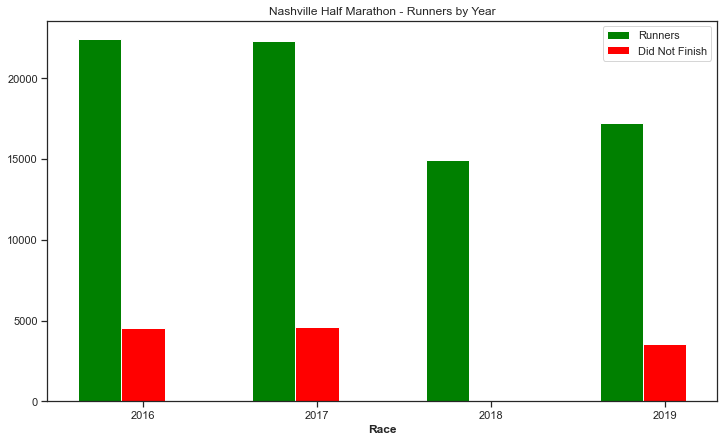

In [303]:
fig, ax = plt.subplots(figsize=(12,7))
# set width of bar
barWidth = 0.25
 
# Set position of bar on X axis
r1 = np.arange(len(half_races['Runners']))
r2 = [x + barWidth for x in r1]
#r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, half_races['Runners'], color='green', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, half_races['Did Not Finish'], color='red', width=barWidth, edgecolor='white', label='var2')
 
# Add xticks on the middle of the group bars
plt.title('Nashville Half Marathon - Runners by Year')
plt.xlabel('Race', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(half_races['Runners']))], half_races['Race'])
 
# Create legend & Show graphic
plt.legend(('Runners', 'Did Not Finish'))
plt.show()

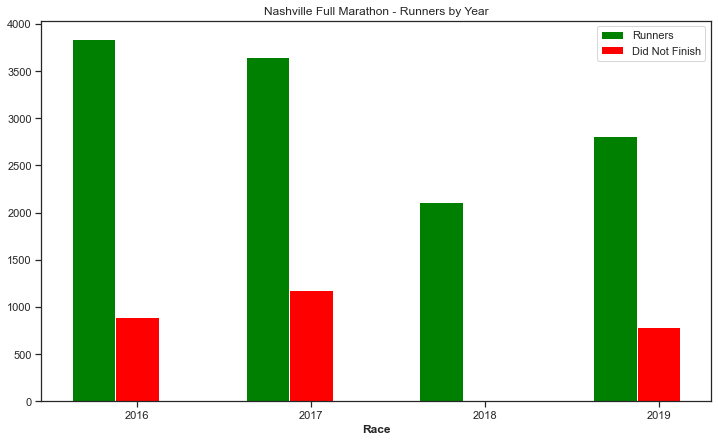

In [304]:
fig, ax = plt.subplots(figsize=(12,7))
# set width of bar
barWidth = 0.25
 
# Set position of bar on X axis
r1 = np.arange(len(full_races['Runners']))
r2 = [x + barWidth for x in r1]
#r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, full_races['Runners'], color='green', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, full_races['Did Not Finish'], color='red', width=barWidth, edgecolor='white', label='var2')
 
# Add xticks on the middle of the group bars
plt.title('Nashville Full Marathon - Runners by Year')
plt.xlabel('Race', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(full_races['Runners']))], full_races['Race'])
 
# Create legend & Show graphic
plt.legend(('Runners', 'Did Not Finish'))
plt.show()

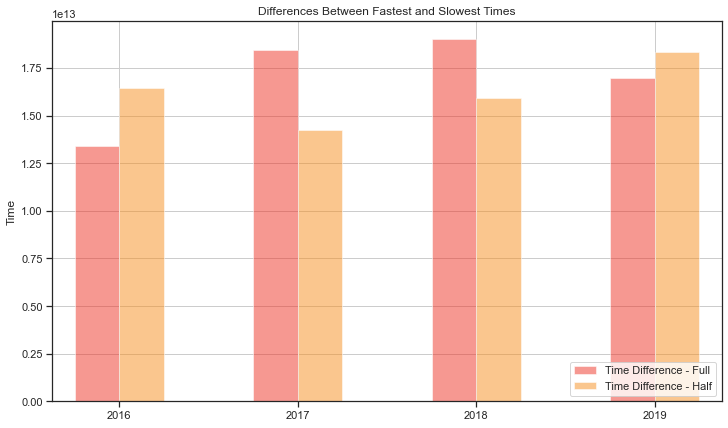

In [307]:
# Setting the positions and width for the bars
pos = list(range(len(full_races['Time Difference']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(12,7))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        half_races['Time Difference'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=half_races['Time Difference'][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        full_races['Time Difference'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=full_races['Time Difference'][1]) 

# Set the y axis label
ax.set_ylabel('Time')

# Set the chart's title
ax.set_title('Differences Between Fastest and Slowest Times')

# Set the position of the x ticks
ax.set_xticks([p + 0.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(full_races['Race'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*2)
#plt.ylim([0, max(half_races['Time Difference'])] )

# Adding the legend and showing the plot
plt.legend(['Time Difference - Full', 'Time Difference - Half'], loc='lower right')
plt.grid()
plt.show()

In [350]:
# Setting the positions and width for the bars
pos = list(range(len(full_races['Fastest Time']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(12,7))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        full_races['Fastest Time'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=full_races['Fastest Time'][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        full_races['Slowest Time'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=full_races['Slowest Time'][1]) 

# Set the y axis label
ax.set_ylabel('Time')

# Set the chart's title
ax.set_title('Full Marathon Times')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_yticks([0, 7])

# Set the labels for the x ticks
ax.set_xticklabels(full_races['Race'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
#plt.ylim([0, max(full_races['Fastest Time'])] + full_races['Slowest Time'])

# Adding the legend and showing the plot
plt.legend(['Fastest Time', 'Slowest Time'], loc='upper right')
plt.grid()
plt.show()

ValueError: DateFormatter found a value of x=0, which is an illegal date; this usually occurs because you have not informed the axis that it is plotting dates, e.g., with ax.xaxis_date()

<Figure size 864x504 with 1 Axes>

In [345]:
plt.bar('Race', 'Fastest Time', data = full_races)
plt.xticks(rotation = 70)
plt.title('');

ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units